In [60]:
from salad.serialize import read
from pathlib import Path
from functools import lru_cache
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import astropy.table
import astropy.units as u
from astropy.coordinates import SkyCoord

In [6]:
def load_results(search_prefix, detector, snr, time_type, search_label, step="filtered"):
    # get recoveries at a certain step
    p = Path(f"/epyc/projects/salad/search/{search_prefix}/DEEP/20190403/A0c/detector_{detector}/snr_{snr}/{time_type}/{search_label}")
    return read(list(p.rglob(f"{step}.pkl"))[0])


def load_summary(search_prefix, detector, snr, time_type, search_label, step="filtered"):
    # get recoveries at a certain step
    p = Path(f"/epyc/projects/salad/search/{search_prefix}/DEEP/20190403/A0c/detector_{detector}/snr_{snr}/{time_type}/{search_label}")
    return read(list(p.rglob(f"{step}_summary.pkl"))[0])


def load_fakes(search_prefix, detector):
    p = Path(f"/epyc/projects/salad/search/{search_prefix}/DEEP/20190403/A0c/detector_{detector}")
    return read(list(p.rglob(f"fakes.pkl"))[0])    

def recoveries(search_prefix, detector, snr, time_type, search_label, step="filtered"):
    # get recoveries at a certain step
    p = Path(f"/epyc/projects/salad/search/{search_prefix}/DEEP/20190403/A0c/detector_{detector}/snr_{snr}/{time_type}/{search_label}")
    return read(list(p.rglob(f"{step}_recovery.pkl"))[0])


In [30]:
detector = 19
snr = 3.0
o = 10406836
r = recoveries("new", detector, snr, "regular", "asteroid")
f = load_fakes("new", detector)

i = recoveries("new", detector, snr, "regular", "asteroid", step="filtered")[o]['info']
print(o, "v", (i['vra']**2 + i['vdec']**2)**0.5)
for step in ["clusters", "gathered_1", "gathered_2", "gathered_3", "gathered_4", "deduplicated", "filtered"]:
    print(step, recoveries("new", detector, snr, "regular", "asteroid", step=step)[o]['points'])


10406836 v 0.09886683661009833 deg / d
clusters {8: {'fake': 92, 'total': 104}, 378: {'fake': 18, 'total': 46}, 389: {'fake': 2, 'total': 39}, 918: {'fake': 5, 'total': 37}, 1423: {'fake': 1, 'total': 26}}
gathered_1 {8: {'fake': 104, 'total': 104}, 378: {'fake': 104, 'total': 104}, 918: {'fake': 3, 'total': 12}, 1357: {'fake': 104, 'total': 104}}
gathered_2 {8: {'fake': 104, 'total': 104}, 378: {'fake': 104, 'total': 104}, 918: {'fake': 1, 'total': 5}, 1357: {'fake': 104, 'total': 104}}
gathered_3 {8: {'fake': 104, 'total': 104}, 378: {'fake': 104, 'total': 104}, 918: {'fake': 1, 'total': 5}, 1357: {'fake': 104, 'total': 104}}
gathered_4 {8: {'fake': 104, 'total': 104}, 378: {'fake': 104, 'total': 104}, 918: {'fake': 1, 'total': 5}, 1357: {'fake': 104, 'total': 104}}
deduplicated {8: {'fake': 104, 'total': 104}, 918: {'fake': 1, 'total': 5}}
filtered {}


In [31]:
detector = 8
snr = 3.0
o = 10714893
r = recoveries("new", detector, snr, "regular", "asteroid")
f = load_fakes("new", detector)

i = recoveries("new", detector, snr, "regular", "asteroid", step="filtered")[o]['info']
print(o, "v", (i['vra']**2 + i['vdec']**2)**0.5)
for step in ["clusters", "gathered_1", "gathered_2", "gathered_3", "gathered_4", "deduplicated", "filtered"]:
    print(step, recoveries("new", detector, snr, "regular", "asteroid", step=step)[o]['points'])


10714893 v 0.1428680106849523 deg / d
clusters {137: {'fake': 6, 'total': 47}}
gathered_1 {}
gathered_2 {}
gathered_3 {}
gathered_4 {}
deduplicated {}
filtered {}


In [43]:
for o, d in [(10406836, 19), (10714893, 8), (10902401, 37), (11447771, 35), (13497327, 53), (14117798, 8), (14178134, 59), (14279119, 17)]:
    r = recoveries("new", d, snr, "regular", "asteroid")
    f = load_fakes("new", d)

    i = recoveries("new", d, snr, "regular", "asteroid", step="filtered")[o]['info']
    print(o, "v", (i['vra']**2 + i['vdec']**2)**0.5)
    for step in ["clusters", "gathered_1", "gathered_2", "gathered_3", "gathered_4", "deduplicated", "filtered"]:
        print(step, recoveries("new", d, snr, "regular", "asteroid", step=step)[o]['points'])
    print()

10406836 v 0.09886683661009833 deg / d
clusters {8: {'fake': 92, 'total': 104}, 378: {'fake': 18, 'total': 46}, 389: {'fake': 2, 'total': 39}, 918: {'fake': 5, 'total': 37}, 1423: {'fake': 1, 'total': 26}}
gathered_1 {8: {'fake': 104, 'total': 104}, 378: {'fake': 104, 'total': 104}, 918: {'fake': 3, 'total': 12}, 1357: {'fake': 104, 'total': 104}}
gathered_2 {8: {'fake': 104, 'total': 104}, 378: {'fake': 104, 'total': 104}, 918: {'fake': 1, 'total': 5}, 1357: {'fake': 104, 'total': 104}}
gathered_3 {8: {'fake': 104, 'total': 104}, 378: {'fake': 104, 'total': 104}, 918: {'fake': 1, 'total': 5}, 1357: {'fake': 104, 'total': 104}}
gathered_4 {8: {'fake': 104, 'total': 104}, 378: {'fake': 104, 'total': 104}, 918: {'fake': 1, 'total': 5}, 1357: {'fake': 104, 'total': 104}}
deduplicated {8: {'fake': 104, 'total': 104}, 918: {'fake': 1, 'total': 5}}
filtered {}

10714893 v 0.1428680106849523 deg / d
clusters {137: {'fake': 6, 'total': 47}}
gathered_1 {}
gathered_2 {}
gathered_3 {}
gathered_4 

In [68]:
i['min_dv']

<Quantity 0.00943835 deg / d>

10714893 v 0.1428680106849523 deg / d phi 161.0887654114458 deg 19
clusters {137: {'fake': 6, 'total': 47}}


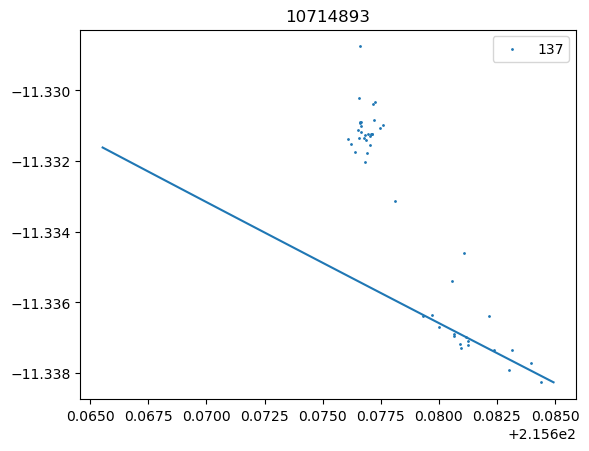


10902401 v 0.19430321461174557 deg / d phi 128.5372196651383 deg 26
clusters {149: {'fake': 11, 'total': 43}, 458: {'fake': 9, 'total': 44}}


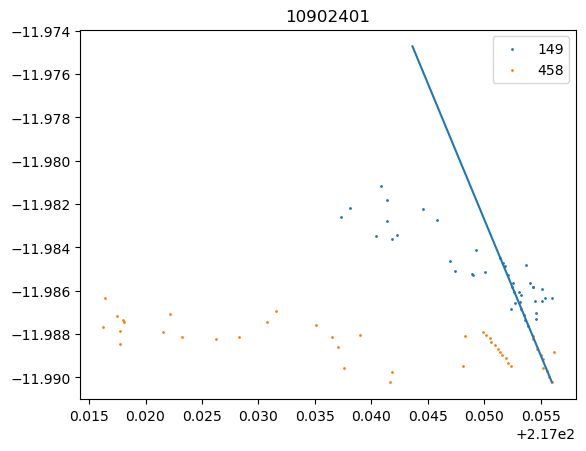


11447771 v 0.11676320903568155 deg / d phi 178.00034081364078 deg 16
clusters {357: {'fake': 4, 'total': 35}, 423: {'fake': 1, 'total': 38}, 731: {'fake': 2, 'total': 33}}


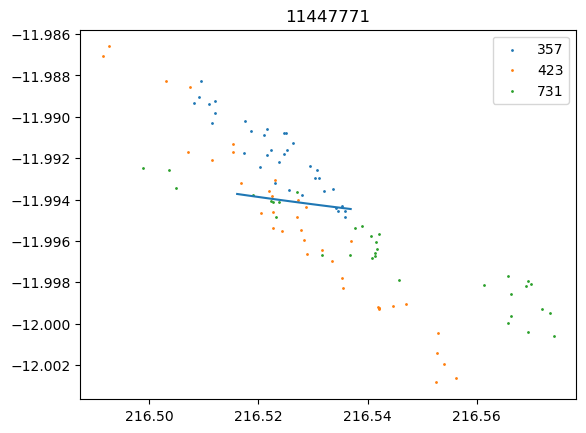

gathered_1 {731: {'fake': 1, 'total': 8}}


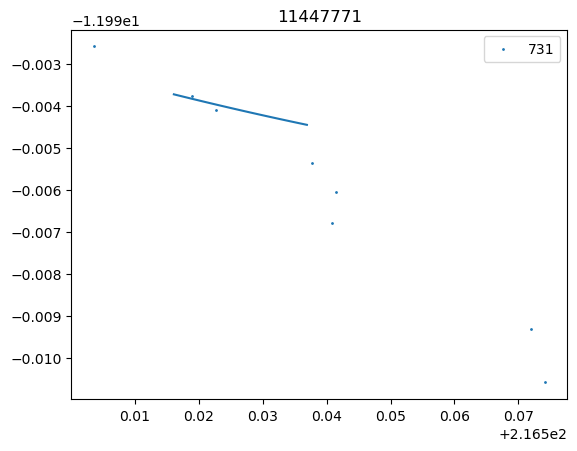

gathered_2 {731: {'fake': 1, 'total': 3}}


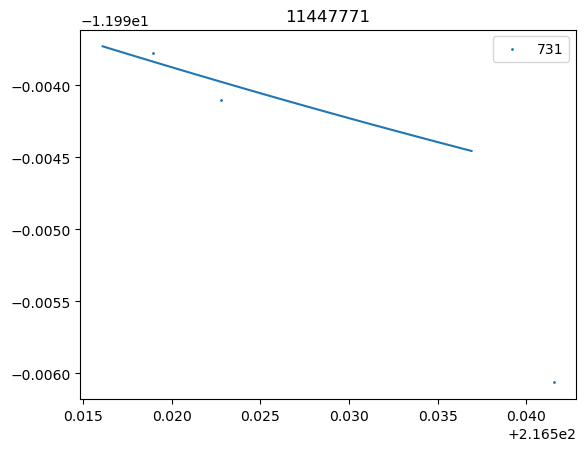

gathered_3 {731: {'fake': 1, 'total': 4}}


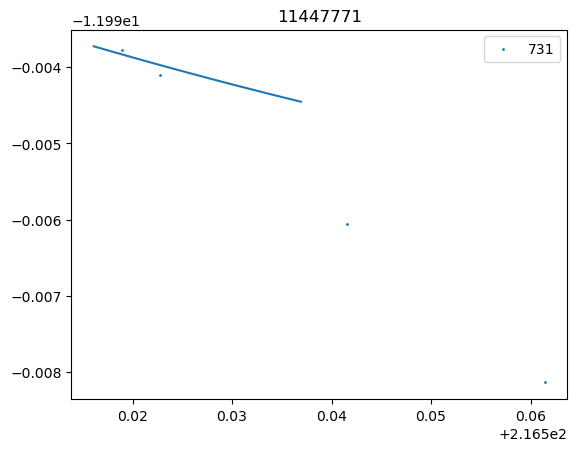

gathered_4 {731: {'fake': 1, 'total': 4}}


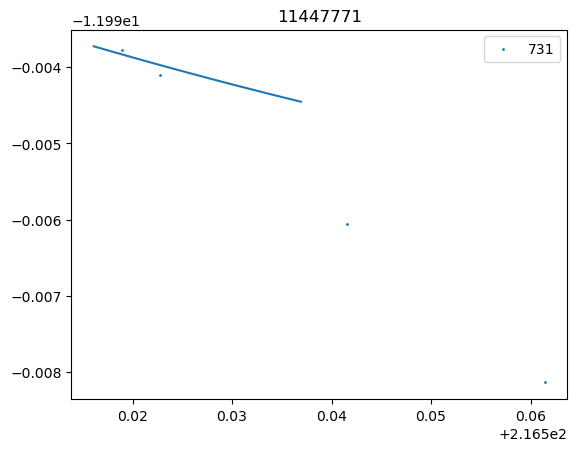

deduplicated {731: {'fake': 1, 'total': 4}}


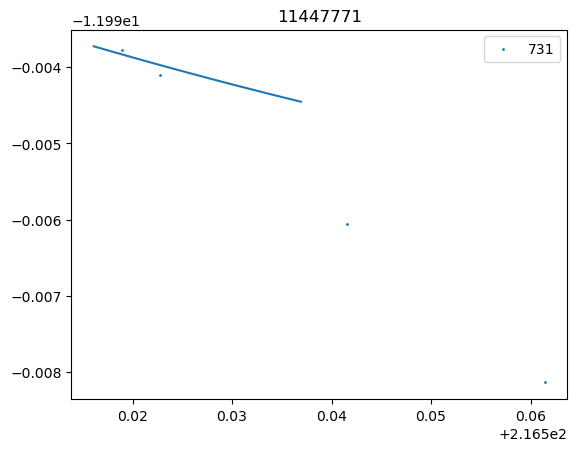


13497327 v 0.1444953287240697 deg / d phi 143.70145124142422 deg 18
clusters {78: {'fake': 10, 'total': 54}, 1177: {'fake': 4, 'total': 32}}


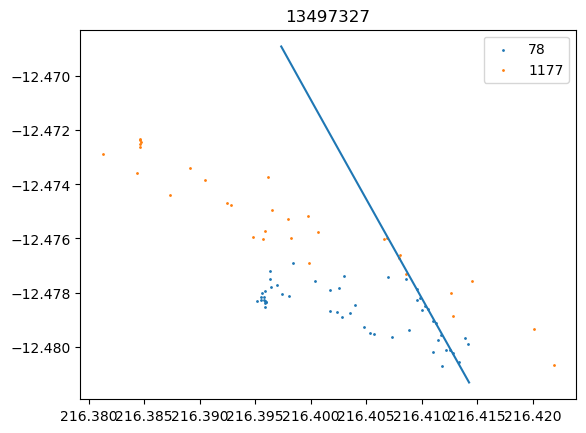

gathered_1 {78: {'fake': 5, 'total': 21}}


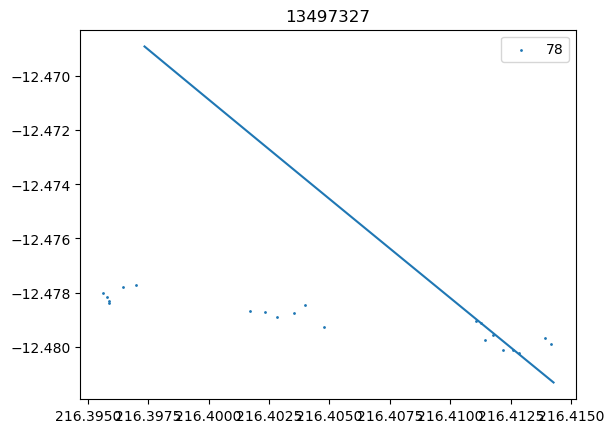

gathered_2 {78: {'fake': 3, 'total': 9}}


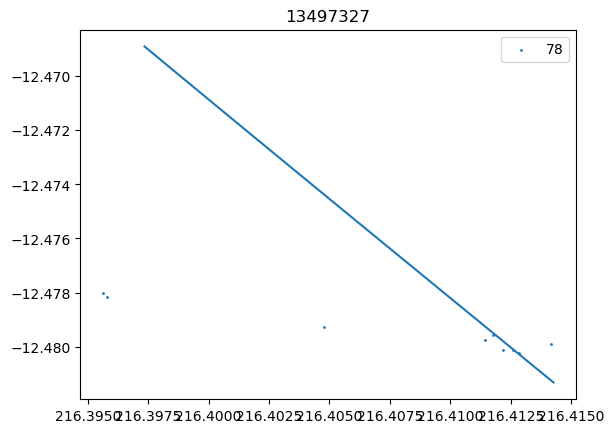

gathered_3 {78: {'fake': 2, 'total': 8}}


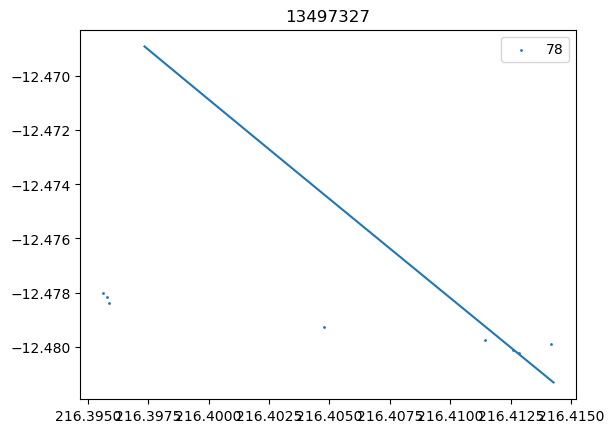

gathered_4 {78: {'fake': 2, 'total': 8}}


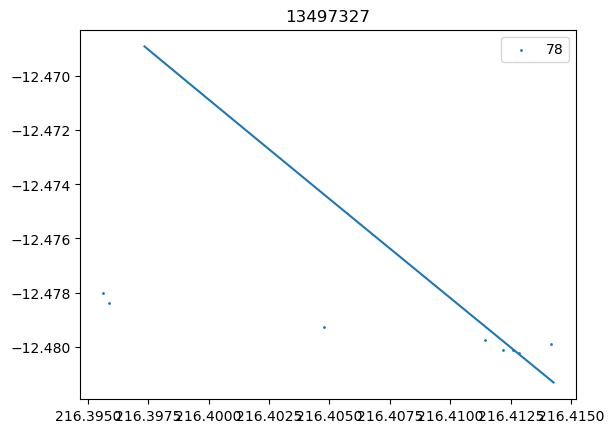

deduplicated {78: {'fake': 2, 'total': 8}}


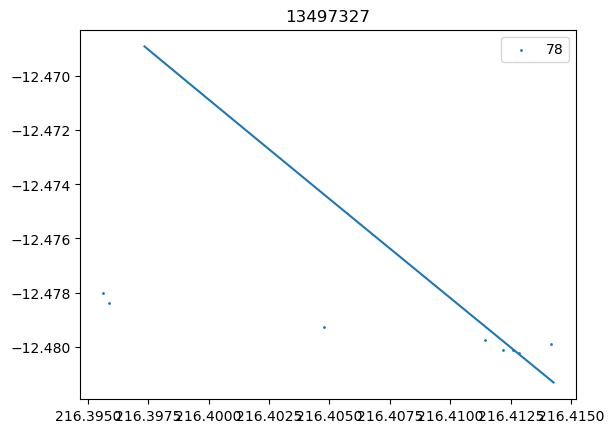


14117798 v 0.11479069878077044 deg / d phi 158.30297864657115 deg 34
clusters {9: {'fake': 5, 'total': 112}, 233: {'fake': 34, 'total': 59}, 677: {'fake': 2, 'total': 36}}


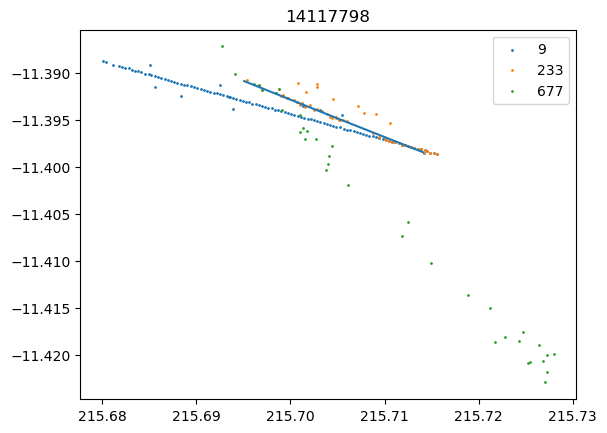

gathered_1 {9: {'fake': 4, 'total': 102}, 233: {'fake': 4, 'total': 102}}


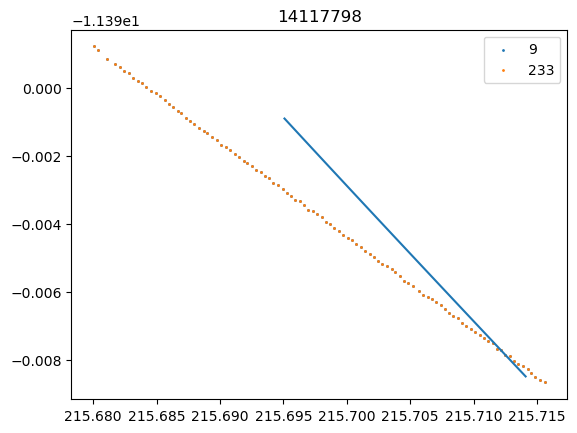

gathered_2 {9: {'fake': 4, 'total': 102}, 233: {'fake': 4, 'total': 102}}


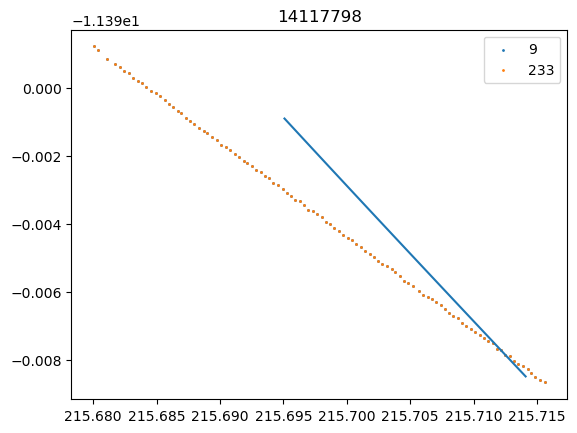

gathered_3 {9: {'fake': 4, 'total': 102}, 233: {'fake': 4, 'total': 102}}


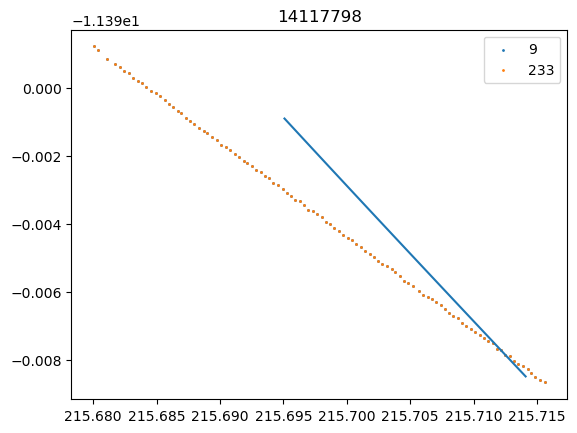

gathered_4 {9: {'fake': 4, 'total': 102}, 233: {'fake': 4, 'total': 102}}


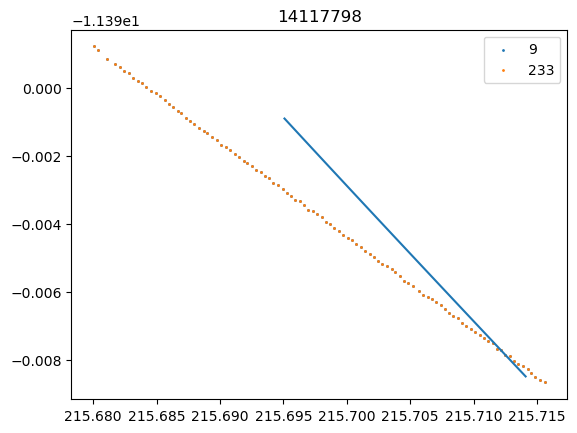

deduplicated {9: {'fake': 4, 'total': 102}}


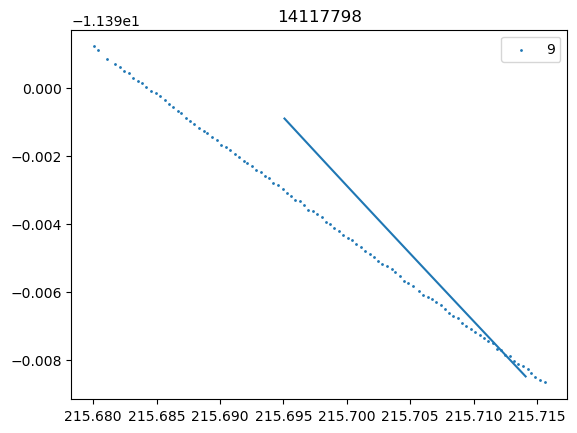

filtered {9: {'fake': 4, 'total': 102}}


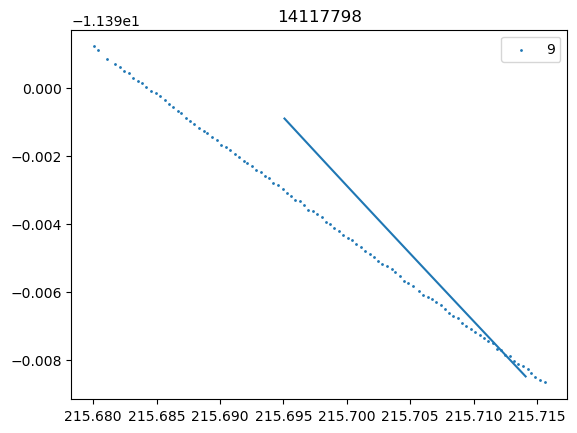


14178134 v 0.24519545688942418 deg / d phi 127.44042373955041 deg 18
clusters {35: {'fake': 2, 'total': 65}, 221: {'fake': 4, 'total': 41}, 1167: {'fake': 5, 'total': 30}}


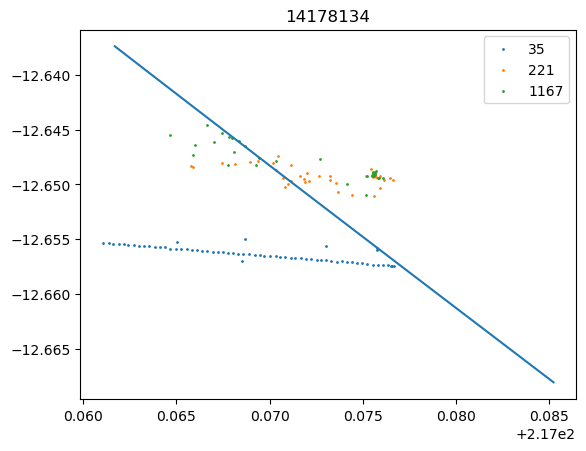

gathered_1 {221: {'fake': 2, 'total': 8}}


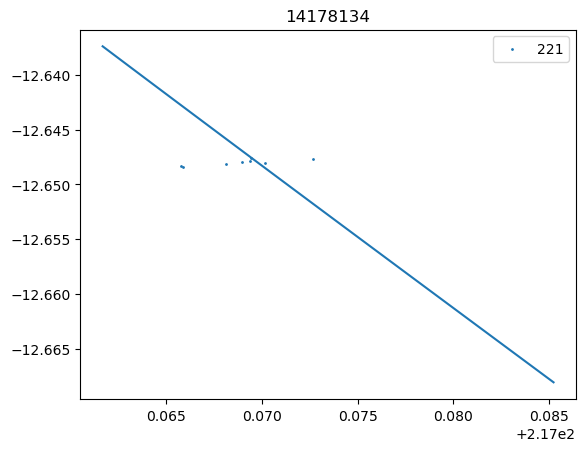

gathered_2 {221: {'fake': 1, 'total': 5}}


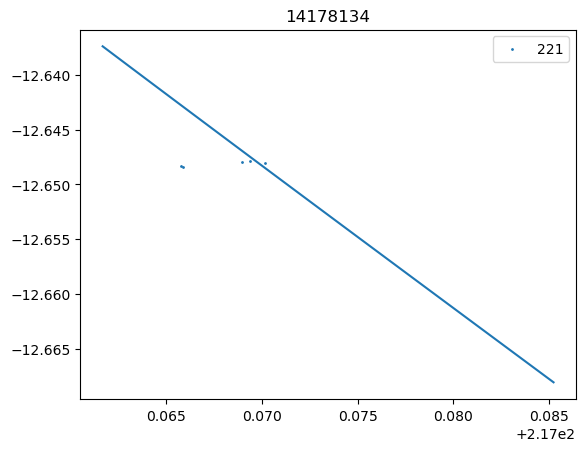

gathered_3 {221: {'fake': 1, 'total': 4}}


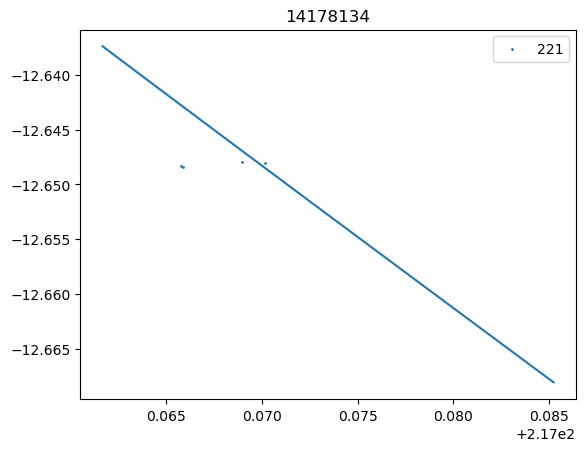

gathered_4 {221: {'fake': 1, 'total': 4}}


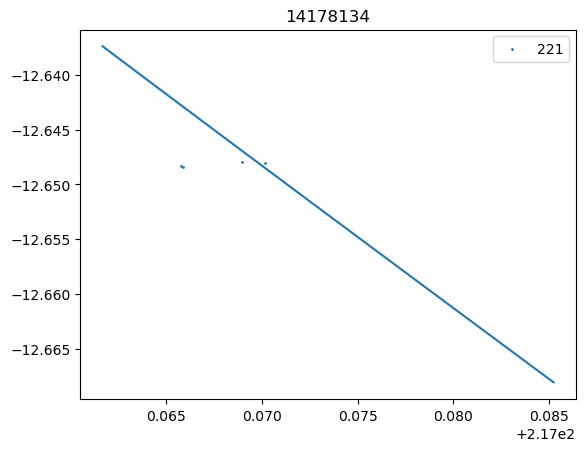

deduplicated {221: {'fake': 1, 'total': 4}}


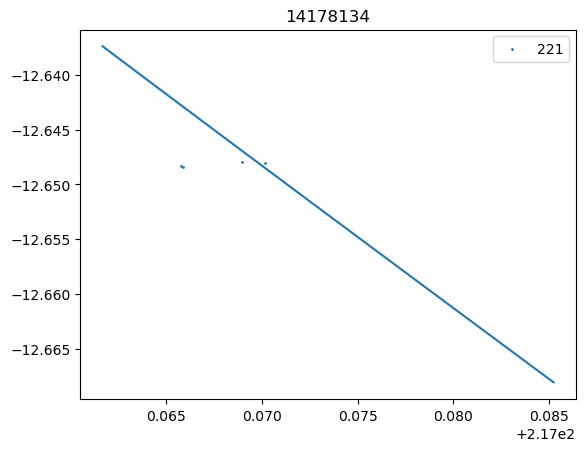

In [64]:
import numpy as np
for o, d in [(10714893, 8), (10902401, 37), (11447771, 35), (13497327, 53), (14117798, 8), (14178134, 59)]:
    r = recoveries("new", d, snr, "regular", "asteroid")
    f = load_fakes("new", d)

    i = r[o]['info']
    print(
        o, "v", (i['vra']**2 + i['vdec']**2)**0.5, "phi", np.arctan2(i['vdec'], i['vra']).to(u.deg), r[o]['catalog']['fake']
    )
    _f = f[f['ORBITID'] == o]
    c_f = SkyCoord(_f['RA']*u.deg, _f['DEC']*u.deg)
    for step in ["clusters", "gathered_1", "gathered_2", "gathered_3", "gathered_4", "deduplicated", "filtered"]:
        p = recoveries("new", d, snr, "regular", "asteroid", step=step)[o]['points']
        if len(p) > 0:
            print(step, p)
            clusters = load_results("new", d, snr, "regular", "asteroid", step=step)
            for k in p:
                c = clusters[k]
                c_s = SkyCoord(c.points[:, 0]*u.deg, c.points[:, 1]*u.deg)
                plt.scatter(c_s.ra, c_s.dec, s=1, label=k)
            plt.plot(c_f.ra, c_f.dec)
            plt.legend()
            plt.title(o)
            plt.show()
    print()

In [113]:
clusters = load_results("new", d, snr, "regular", "asteroid", step="clusters")

In [ ]:
clusters[]

In [219]:
def was_found(fake_recovery, threshold=15, vmin=0.1, vmax=0.5):
    ret = []
    for o in fake_recovery:
        f = fake_recovery[o]
        found_points = False
        found_line = False
        n_points = 0
        n_lines = 0
        for c in f['points']:
            p = f['points'][c]
            precision = p['fake']/p['total']
            recall = p['fake']/f['catalog']['fake']
            if precision > 0.5:
                found_points = True
                n_points += 1
                
            if c in f['line']:
                l = f['line'][c]
                line_recovery = l['fake']/l['total']
                if precision > 0.5 and line_recovery > 0.5:
                    found_line = True
                    n_lines += 1
        
        v = ((f['info']['vra']**2 + f['info']['vdec']**2)**0.5)
        if hasattr(v, "unit"):
            v = v.value
        ret.append(
            {
                "orbit": o,
                "found_points": found_points,
                "found_line": found_line,
                "points": f['catalog']['fake'],
                "n_points": n_points,
                "n_lines": n_lines,
                "fake_detection": f['catalog']['fake'],
                "fake_injection": f['catalog']['total'],
                "filtered": (v < vmin) | (v > vmax)
            }
        )
        
        if 'findable' in f['info']:
            ret[-1]['in_search'] = f['info']['findable']
        elif f['catalog']['total'] == 1:
            ret[-1]['in_search'] = False
            
            
    return astropy.table.Table(ret)


In [221]:
read(
    "/epyc/projects/salad/search/new/DEEP/20190403/A0c/detector_8/snr_3.0/regular/asteroid/filtered_recovery.pkl"
)

{4016194: {'points': {},
  'line': {},
  'catalog': {'fake': 0, 'total': 104},
  'info': {'vra': <Quantity -0.01005329 deg / d>,
   'vdec': <Quantity 0.00298604 deg / d>,
   'closest_dir': <Quantity [-0.07954791,  0.06060279] deg / d>,
   'min_dv': <Quantity 0.09027288 deg / d>,
   'distance': <Quantity 0.01610282 deg>,
   'findable': False}},
 4956258: {'points': {},
  'line': {},
  'catalog': {'fake': 0, 'total': 104},
  'info': {'vra': <Quantity -0.00976507 deg / d>,
   'vdec': <Quantity 0.00380171 deg / d>,
   'closest_dir': <Quantity [-0.07954791,  0.06060279] deg / d>,
   'min_dv': <Quantity 0.08997782 deg / d>,
   'distance': <Quantity 0.01605019 deg>,
   'findable': False}},
 6361506: {'points': {},
  'line': {},
  'catalog': {'fake': 1, 'total': 104},
  'info': {'vra': <Quantity -0.00167176 deg / d>,
   'vdec': <Quantity 0.0005411 deg / d>,
   'closest_dir': <Quantity [-0.07954791,  0.06060279] deg / d>,
   'min_dv': <Quantity 0.09834683 deg / d>,
   'distance': <Quantity 0.01

In [220]:

was_found(read(
    "/epyc/projects/salad/search/new/DEEP/20190403/A0c/detector_8/snr_3.0/regular/asteroid/filtered_recovery.pkl"
))

orbit,found_points,found_line,points,n_points,n_lines,fake_detection,fake_injection,filtered,in_search
int64,bool,bool,int64,int64,int64,int64,int64,bool,bool
4016194,False,False,0,0,0,0,104,True,False
4956258,False,False,0,0,0,0,104,True,False
6361506,False,False,1,0,0,1,104,True,False
12040355,True,True,43,1,1,43,104,False,False
14117798,True,True,34,1,1,34,104,False,True
10328446,False,False,3,0,0,3,59,False,True
2859242,False,False,81,0,0,81,104,True,False
5402058,False,False,40,0,0,40,104,True,False
12593612,False,False,0,0,0,0,2,False,True


In [218]:

was_found(
    read(
        "/epyc/projects/salad/search/new/DEEP/20190403/A0c/detector_8/snr_3.0/regular/_asteroid/filtered_recovery.pkl"
    )
)

orbit,found_points,found_line,points,n_points,n_lines,fake_detection,fake_injection,filtered,in_search
int64,bool,bool,int64,int64,int64,int64,int64,bool,bool
4016194,False,False,0,0,0,0,104,True,False
4956258,False,False,0,0,0,0,104,True,False
6361506,False,False,1,0,0,1,104,True,False
12040355,True,True,43,1,1,43,104,False,False
14117798,False,False,34,0,0,34,104,False,True
10328446,False,False,3,0,0,3,59,False,True
2859242,False,False,81,0,0,81,104,True,False
5402058,False,False,40,0,0,40,104,True,False
12593612,False,False,0,0,0,0,2,False,True


In [222]:
len(read(
    "/epyc/projects/salad/search/new/DEEP/20190403/A0c/detector_8/snr_3.0/regular/asteroid/filtered.pkl"
))

20

In [223]:
len(read(
    "/epyc/projects/salad/search/new/DEEP/20190403/A0c/detector_8/snr_3.0/regular/_asteroid/filtered.pkl"
))

19

In [167]:
d = 8
o = 10714893
_r = read(
    "/epyc/projects/salad/search/new/DEEP/20190403/A0c/detector_8/snr_3.0/regular/asteroid/filtered_recovery_2.pkl"
)[o]
f = load_fakes("new", d)
_f = f[f['ORBITID'] == o]
_r['info']['closest_dir']
c_f = SkyCoord(_f['RA']*u.deg, _f['DEC']*u.deg)

In [106]:
catalog = read(
    "/epyc/projects/salad/search/new/DEEP/20190403/A0c/detector_8/snr_3.0/regular/catalog.pkl"
)

In [89]:
_r['info']

{'vra': <Quantity -0.13515626 deg / d>,
 'vdec': <Quantity 0.04630394 deg / d>,
 'closest_dir': <Quantity [-0.14183711,  0.04503049] deg / d>,
 'min_dv': <Quantity 0.00680113 deg / d>,
 'distance': <Quantity 0.00097648 deg>,
 'findable': True}

In [129]:
from salad.hough import Hough
from salad.project import project
from salad.directions import SearchDirections

In [133]:
((_r['info']['closest_dir']**2).sum())**0.5

<Quantity 0.14881367 deg / d>

In [207]:
X = catalog.X()
ref = X[:, 2].min()
dt = X[:, 2].max() - X[:, 2].min()
directions = SearchDirections(
    [0.1*u.deg/u.day, 0.5*u.deg/u.day], 
    [120*u.deg, 240*u.deg], 
    10 * u.arcsec, 
    dt * u.day
)
directions._b = directions.b[72][None, :]
projection = project(X, directions, ref)
hough = Hough(projection, 10 * u.arcsec, 10 * u.arcsec)
# clusters = []
# for cluster in hough:
#     if len(cluster.points) < 25:
#         break
#     clusters.append(cluster)

In [198]:
len(clusters)

856

In [202]:
clusters[-1]

(25, 4)

In [194]:
hough.array.shape

(1, 116, 54)

In [173]:
np.where(np.logical_and.reduce(directions.b == _r['info']['closest_dir'], axis=1))

(array([72]),)

In [140]:
hough.array.shape

(507, 138, 79)

In [158]:
np.unravel_index(hough.array[72].argmax(), (138, 79))

(56, 38)

In [172]:
np.where(hough.array[72] == hough.array[72].max())

(array([56, 60]), array([38, 60]))

In [176]:
x = X[(hough.bins[72, :, 0] == 56) & (hough.bins[72, :, 1] == 38)]

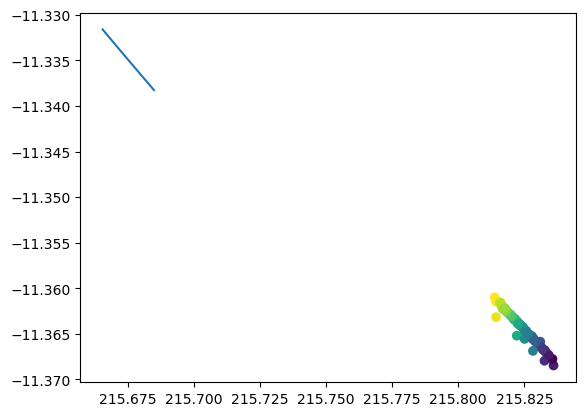

In [175]:
c_s = SkyCoord(x[:, 0]*u.deg, x[:, 1]*u.deg)
plt.scatter(c_s.ra, c_s.dec, c=x[:, 2])
plt.plot(c_f.ra, c_f.dec)
plt.show()

In [206]:
hough.array.shape

(1, 116, 54)

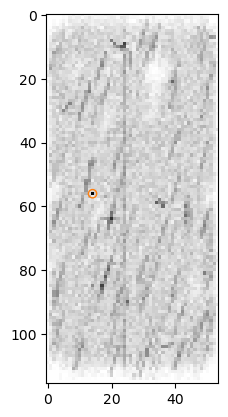

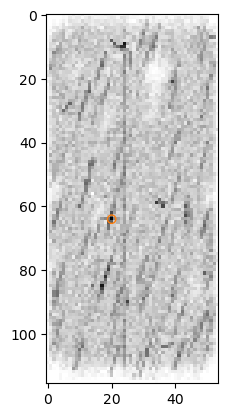

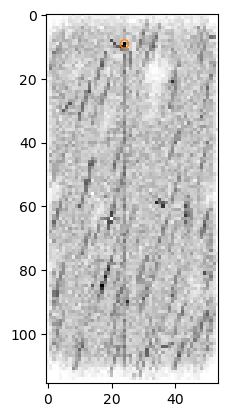

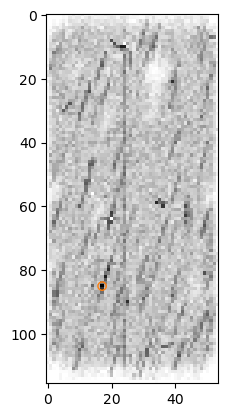

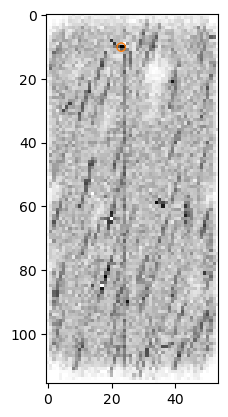

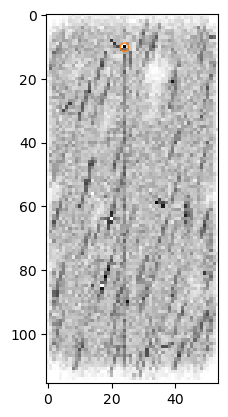

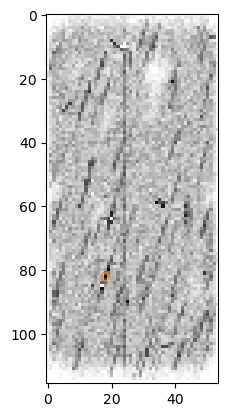

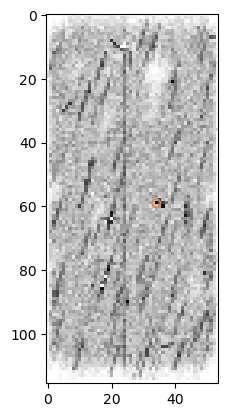

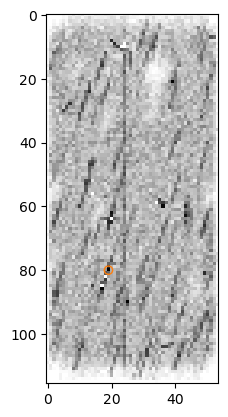

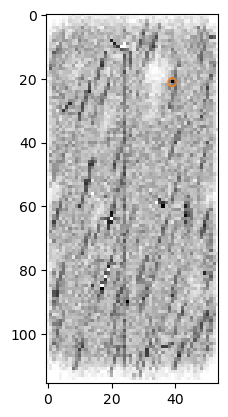

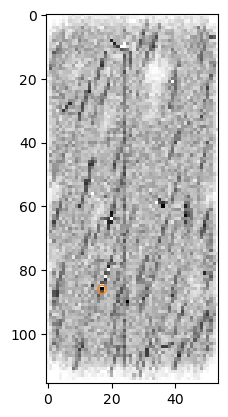

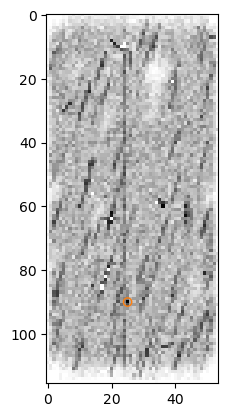

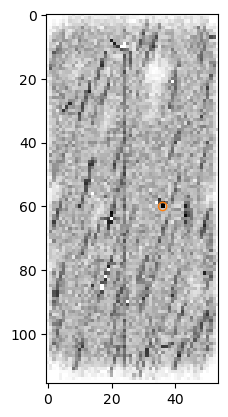

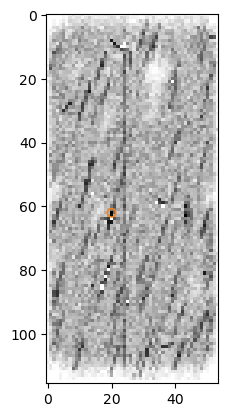

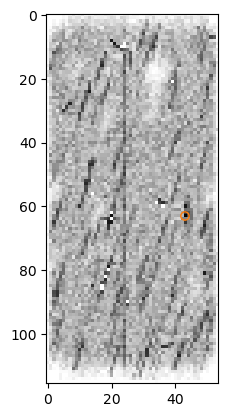

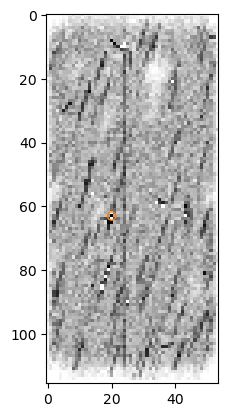

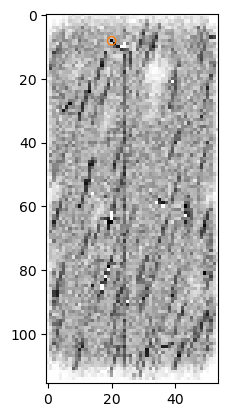

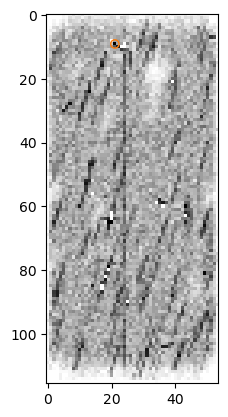

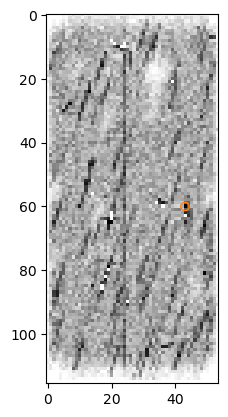

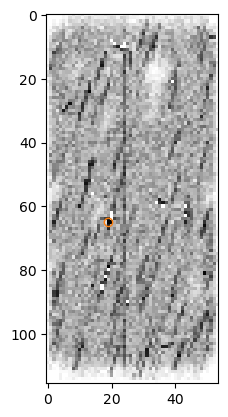

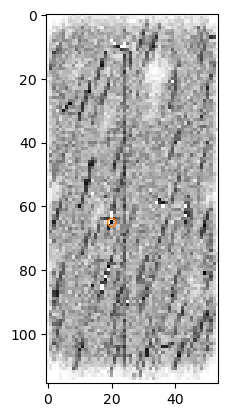

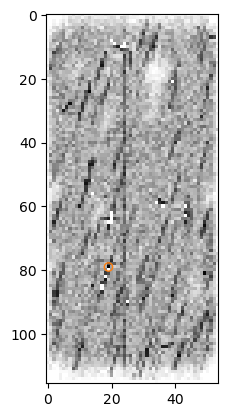

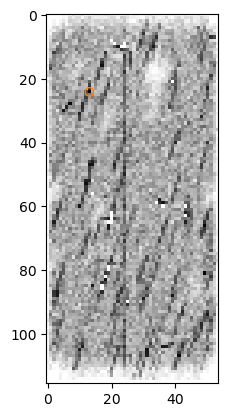

In [213]:
hough = Hough(projection, 10 * u.arcsec, 10 * u.arcsec)

plt.imshow(hough.array[0], cmap='gray_r')
plt.scatter(hough.argmax()[2], hough.argmax()[1], facecolor='none', edgecolor='C1')
plt.show()
for cluster in hough:
    if len(cluster.points) < 50:
        break
    plt.imshow(hough.array[0], cmap='gray_r')
    plt.scatter(hough.argmax()[2], hough.argmax()[1], facecolor='none', edgecolor='C1')
    plt.show()


In [150]:
hough.array[72]

87

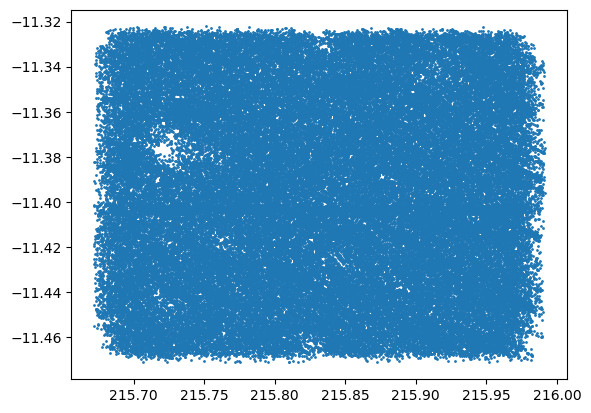

In [123]:
X = catalog.X()
v_ra = _r['info']['closest_dir'][0]
v_dec = _r['info']['closest_dir'][1]

ra = X[:, 0] - ((X[:, 2]-X[:, 2].min())*u.day * v_ra).value 
dec = X[:, 1] - ((X[:, 2]-X[:, 2].min())*u.day * v_dec).value 


In [117]:
v_ra

<Quantity -0.14183711 deg / d>

In [91]:
((0.00680113 * (_f['mjd_mid'].max() - _f['mjd_mid'].min()))*u.deg).to(u.arcsec)

<Quantity 3.51533107 arcsec>

In [100]:
((_f['mjd_mid'].max() - _f['mjd_mid'].min())*u.day).to(u.hour)

<Quantity 3.4458304 h>

In [97]:
(
    (_r['info']['vra'] - _r['info']['closest_dir'][0]) * 
    (_f['mjd_mid'].max() - _f['mjd_mid'].min())*u.day
).to(u.arcsec)

<Quantity 3.4531611 arcsec>

In [98]:
(
    (_r['info']['vdec'] - _r['info']['closest_dir'][1]) * 
    (_f['mjd_mid'].max() - _f['mjd_mid'].min())*u.day
).to(u.arcsec)

<Quantity 0.65821313 arcsec>

In [95]:
_r['info']['closest_dir']

<Quantity [-0.14183711,  0.04503049] deg / d>

In [87]:
dt = (_f['mjd_mid'] - _f['mjd_mid'].min()) * u.day
ra = (_r['info']['closest_dir'][0] * dt).to(u.arcsec)
dec = (_r['info']['closest_dir'][1] * dt).to(u.arcsec)

In [112]:
from salad.fakes.recover import recover

{'points': {},
 'line': {},
 'catalog': {'fake': 19, 'total': 84},
 'info': {'vra': <Quantity -0.13515626 deg / d>,
  'vdec': <Quantity 0.04630394 deg / d>,
  'closest_dir': <Quantity [-0.14183711,  0.04503049] deg / d>,
  'min_dv': <Quantity 0.00680113 deg / d>,
  'distance': <Quantity 0.00097648 deg>,
  'findable': True}}

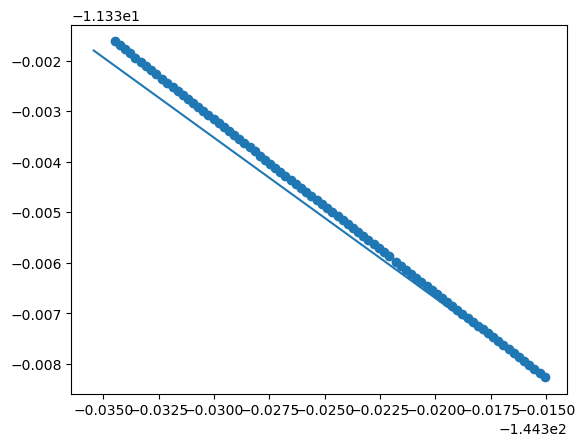

In [105]:
plt.scatter(_f['RA'], _f['DEC'])
plt.plot(
    _f['RA'][0]*u.deg + _r['info']['closest_dir'][0] * dt, 
    _f['DEC'][0]*u.deg + _r['info']['closest_dir'][1] * dt
)
plt.show()

In [108]:
catalog.X()[:, 1]

array([[ 2.15671028e+02, -1.14016307e+01,  5.85772225e+04,
         8.45876000e+05],
       [ 2.15671530e+02, -1.13818543e+01,  5.85772225e+04,
         8.45876000e+05],
       [ 2.15673039e+02, -1.13785748e+01,  5.85772225e+04,
         8.45876000e+05],
       ...,
       [ 2.15963655e+02, -1.13749927e+01,  5.85773695e+04,
         8.45961000e+05],
       [ 2.15964508e+02, -1.13825104e+01,  5.85773695e+04,
         8.45961000e+05],
       [ 2.15964599e+02, -1.13935312e+01,  5.85773695e+04,
         8.45961000e+05]])

In [104]:
(_f['RA']*u.deg - (_f['RA'][0]*u.deg + _r['info']['closest_dir'][0] * dt)).to(u.arcsec)

<Quantity [0.        , 0.04257128, 0.08662056, 0.12891244, 0.17115251,
           0.21330816, 0.25534076, 0.29743956, 0.33901115, 0.38071367,
           0.42211191, 0.46359406, 0.50501019, 0.5462967 , 0.58740586,
           0.62848774, 0.66944227, 0.71030125, 0.75115506, 0.79198467,
           0.83274398, 0.8732716 , 0.91405476, 0.9543758 , 0.99475872,
           1.03526444, 1.07550378, 1.11586731, 1.15612953, 1.19649246,
           1.24896951, 1.28902588, 1.329172  , 1.36934528, 1.40971726,
           1.44973974, 1.48980703, 1.53001544, 1.57008212, 1.61008335,
           1.6499972 , 1.69036242, 1.73103434, 1.77132946, 1.81166817,
           1.85617514, 1.89660338, 1.93683318, 1.97733603, 2.01778873,
           2.05822507, 2.09873904, 2.13907572, 2.17978267, 2.22048106,
           2.26109378, 2.30186713, 2.34273497, 2.38355988, 2.42458391,
           2.46562148, 2.5072223 , 2.54842232, 2.5898183 , 2.63125182,
           2.67291506, 2.71455603, 2.75636668, 2.79825069, 2.84019891,
      

In [88]:
ra, dec

(<Quantity [ -0.        ,  -0.87381653,  -1.78094977,  -2.65467566,
             -3.53000179,  -4.406197  ,  -5.2823708 ,  -6.16241066,
             -7.0338254 ,  -7.91031178,  -8.78264496,  -9.6589148 ,
            -10.53589523, -11.41218132, -12.28663345, -13.16239275,
            -14.03723249, -14.91175868, -15.78780617, -16.66491872,
            -17.54201223, -18.41551718, -19.29585836, -20.16746719,
            -21.04157634, -21.9194329 , -22.79252036, -23.66921539,
            -24.54454497, -25.42282103, -26.56568413, -27.43870333,
            -28.31415867, -29.19059954, -30.0716791 , -30.9453741 ,
            -31.82017747, -32.6981399 , -33.57297918, -34.44628829,
            -35.31748192, -36.19825994, -37.08537439, -37.96381587,
            -38.84268469, -39.81166301, -40.69109427, -41.56544581,
            -42.4448605 , -43.32225322, -44.19827099, -45.07486208,
            -45.94643563, -46.82476529, -47.70157238, -48.57512019,
            -49.4506326 , -50.32660731, -51.2000

In [59]:
d = 8
o = 14117798
f = load_fakes("new", d)
_f = f[f['ORBITID'] == o]

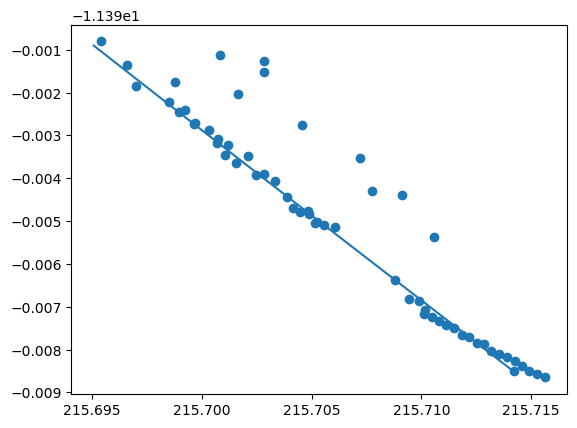

In [61]:
c = load_results("new", d, 3.0, "regular", "asteroid", step='clusters')[233]
c_s = SkyCoord(c.points[:, 0]*u.deg, c.points[:, 1]*u.deg)
c_f = SkyCoord(_f['RA']*u.deg, _f['DEC']*u.deg)
plt.scatter(c_s.ra, c_s.dec)
plt.plot(c_f.ra, c_f.dec)
plt.show()

In [17]:
# velocity filtering needs to be relaxed a little
# or we need to consider fakes that could have passed this filtering

{8: {'fake': 104, 'total': 104},
 378: {'fake': 104, 'total': 104},
 918: {'fake': 3, 'total': 12},
 1357: {'fake': 104, 'total': 104}}

{8: {'fake': 104, 'total': 104},
 378: {'fake': 104, 'total': 104},
 918: {'fake': 1, 'total': 5},
 1357: {'fake': 104, 'total': 104}}

{8: {'fake': 104, 'total': 104},
 378: {'fake': 104, 'total': 104},
 918: {'fake': 1, 'total': 5},
 1357: {'fake': 104, 'total': 104}}

{8: {'fake': 104, 'total': 104},
 378: {'fake': 104, 'total': 104},
 918: {'fake': 1, 'total': 5},
 1357: {'fake': 104, 'total': 104}}

{8: {'fake': 104, 'total': 104}, 918: {'fake': 1, 'total': 5}}

{}

In [25]:
i = recoveries("new", detector, snr, "regular", "asteroid", step="filtered")[10406836]['info']

In [26]:
(i['vra']**2 + i['vdec']**2)**0.5

<Quantity 0.09886684 deg / d>

In [12]:
f[f['ORBITID'] == 10406836]

RA,DEC,EXPNUM,CCDNUM,ORBITID,aei,mjd_mid,TDB,xv,H_VR,AMP,PERIOD,PHASE,d,observatory,r,MAG,type
float64,float64,int32,int64,int64,float64[6],float64,float64,float64[6],float64,float64,float64,float64,float64,float64[3],float64,float64,str8
-144.30504886693907,-11.679370592928484,845872,19,10406836,5.8679935011331334 .. 13.122375056530469,58577.21447994315,19.254525066949327,-6.046804251225612 .. -1.238158529235232,13.92103596076807,0.0,0.0,0.0,7.301183006060197,-0.9723130239773092 .. -0.09252563558321852,6.3756666697547155,22.260630148968616,asteroid
-144.3052150316974,-11.679339333912248,845873,19,10406836,5.8679935011331334 .. 13.122375056530469,58577.21619125002,19.25452975225221,-6.046800015646357 .. -1.2381578729047478,13.92103596076807,0.0,0.0,0.0,7.301183856515419,-0.9723063207295254 .. -0.09253705087391721,6.375655783898841,22.260626694316034,asteroid
-144.30538754766732,-11.679306874118184,845874,19,10406836,5.8679935011331334 .. 13.122375056530469,58577.21796780527,19.254534616195542,-6.04679561855938 .. -1.2381571915471272,13.92103596076807,0.0,0.0,0.0,7.3011847393923475,-0.9722993567140087 .. -0.09254890132897936,6.375644488127446,22.260623109687167,asteroid
-144.3055537249217,-11.679275601131389,845875,19,10406836,5.8679935011331334 .. 13.122375056530469,58577.21967893464,19.2545393010123,-6.046791383392116 .. -1.238156535279583,13.92103596076807,0.0,0.0,0.0,7.301185589751028,-0.9722926441883359 .. -0.09256031528333111,6.3756336133186435,22.260619658755424,asteroid
-144.30572022049375,-11.679244262381399,845876,19,10406836,5.8679935011331334 .. 13.122375056530469,58577.22139319794,19.25454399440946,-6.046787140454483 .. -1.2381558778075248,13.92103596076807,0.0,0.0,0.0,7.301186441663082,-0.9722859144864211 .. -0.09257175006685092,6.37562272349137,22.260616203164194,asteroid
-144.30588689503216,-11.679212883968232,845877,19,10406836,5.8679935011331334 .. 13.122375056530469,58577.2231091633,19.254548692466642,-6.046782893290536 .. -1.2381552196801262,13.92103596076807,0.0,0.0,0.0,7.301187294416897,-0.9722791732233937 .. -0.09258319613091369,6.375611827771102,22.26061274580985,asteroid
-144.30605357863334,-11.67918149777527,845878,19,10406836,5.8679935011331334 .. 13.122375056530469,58577.22482508671,19.254553390408773,-6.046778646217042 .. -1.2381545615662994,13.92103596076807,0.0,0.0,0.0,7.301188147145732,-0.9722724272637077 .. -0.09259464183675381,6.375600937255983,22.260609290214532,asteroid
-144.30622101059083,-11.679149964461969,845879,19,10406836,5.8679935011331334 .. 13.122375056530469,58577.226548581515,19.254558109080563,-6.046774380389703 .. -1.2381539005459854,13.92103596076807,0.0,0.0,0.0,7.301189003633106,-0.972265646659101 .. -0.09260613797159109,6.375590003664966,22.260605821059404,asteroid
-144.3063868139013,-11.679118731636606,845880,19,10406836,5.8679935011331334 .. 13.122375056530469,58577.228255184666,19.25456278150523,-6.04677015635774 .. -1.2381532460017206,13.92103596076807,0.0,0.0,0.0,7.3011898517220795,-0.9722589277096986 .. -0.09261752136145085,6.375579182157864,22.260602387574963,asteroid
